In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
import librosa.display
from IPython.display import Audio

In [2]:
x, sr = lr.load('beatles.wav')

display(Audio(x, rate=sr))

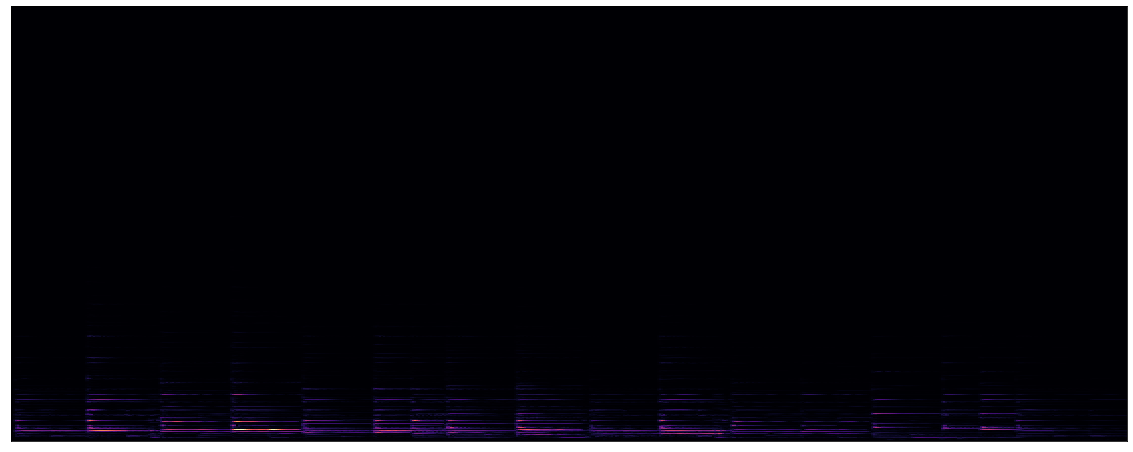

In [3]:
spec = lr.stft(x)

plt.figure(figsize=(20, 8))
lr.display.specshow((np.abs(spec)))
plt.show()

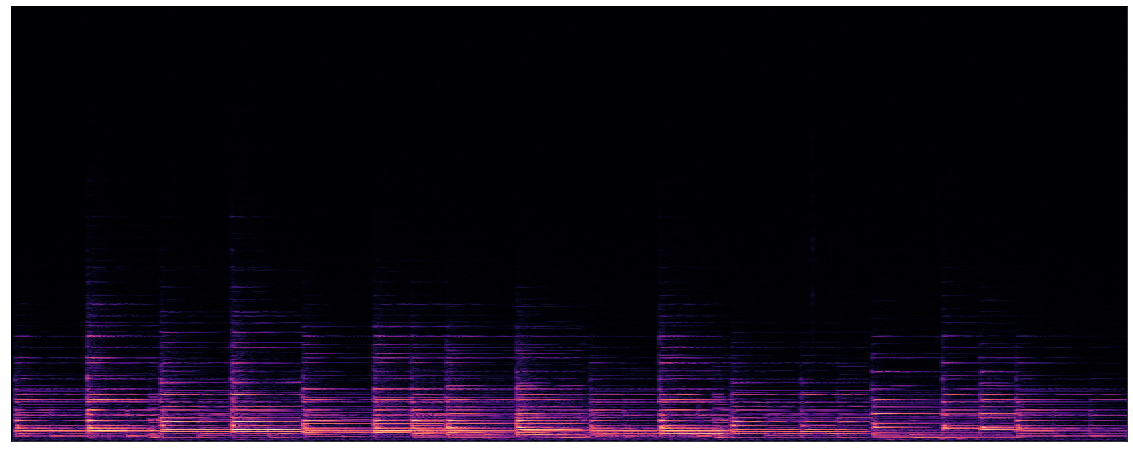

In [4]:
# log gamma compression

gamma = 1
log_gamma_spec = np.log(1 + gamma * np.abs(spec))

plt.figure(figsize=(20, 8))
lr.display.specshow(log_gamma_spec)
plt.show()

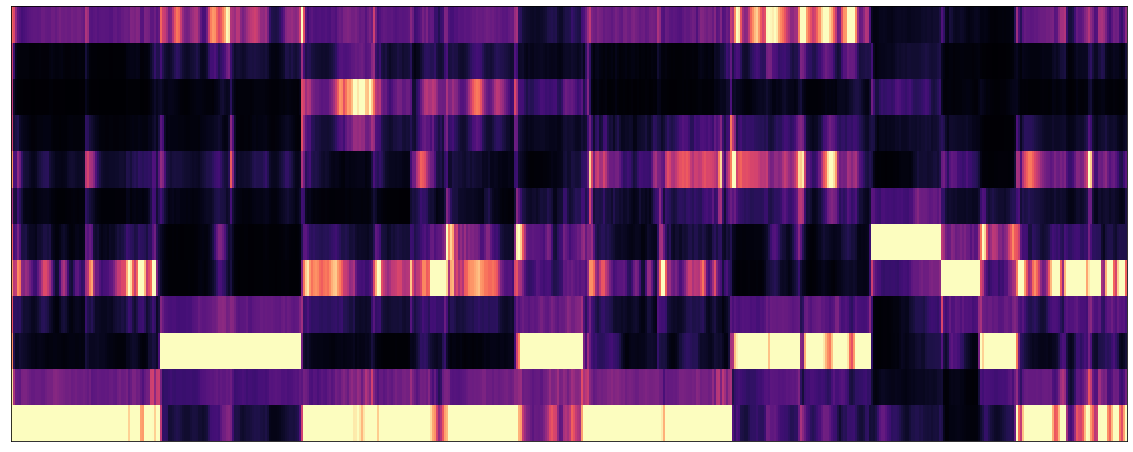

In [5]:
chroma = lr.feature.chroma_stft(y=x)

plt.figure(figsize=(20, 8))
lr.display.specshow(chroma)
plt.show()

In [6]:
# print(chroma)

In [7]:
cmaj_template = np.array([[1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]])
cmin_template = np.array([[1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]])

majmin_templates = np.concatenate([cmaj_template.T, cmin_template.T], axis=1)
majmin_templates.shape

(12, 2)

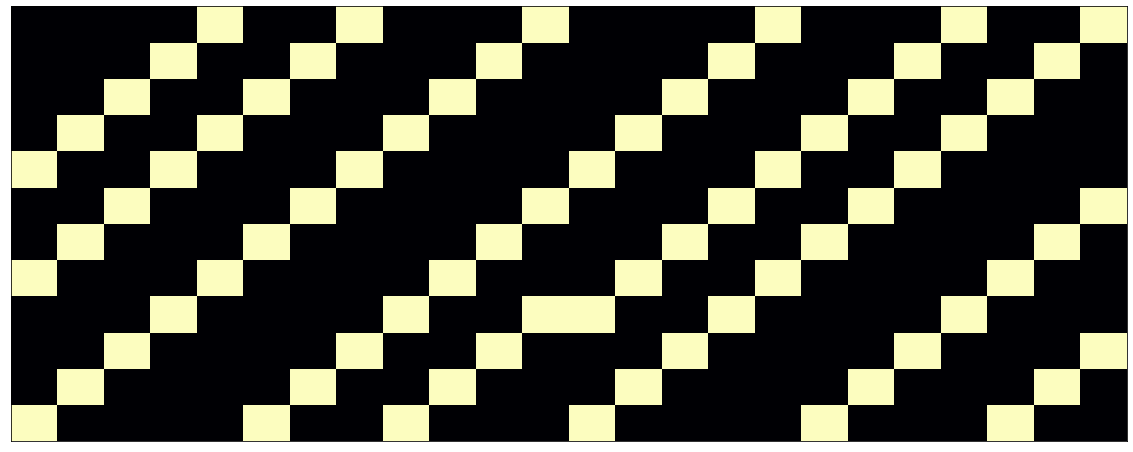

In [8]:
templates = np.zeros((12, 24))

for shift in range(12):
    for template_i in range(majmin_templates.shape[1]):
        templates[:, shift + (12 * template_i)] = np.roll(majmin_templates[:, template_i], shift)

plt.figure(figsize=(20, 8))
lr.display.specshow(templates)
plt.show()

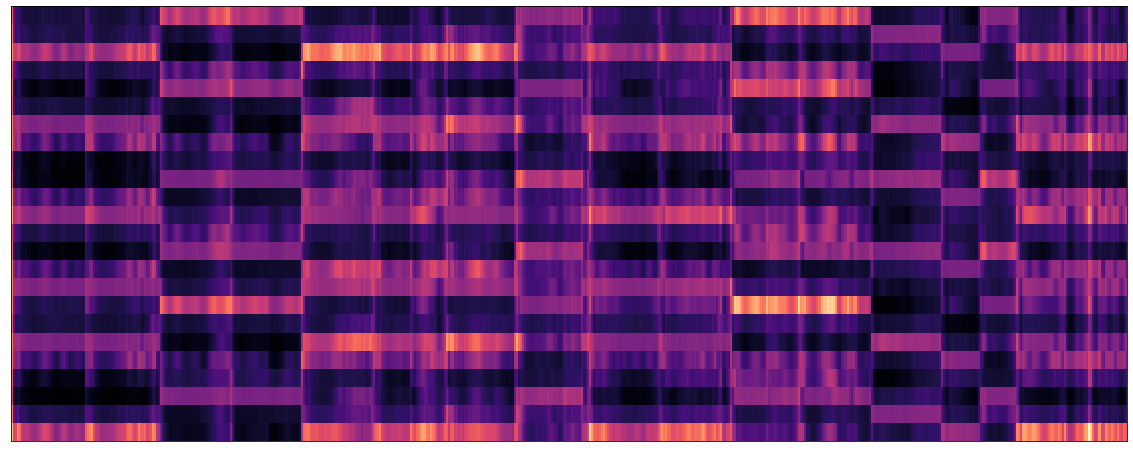

In [9]:
chord_sim = np.matmul(templates.T, chroma)

plt.figure(figsize=(20, 8))
lr.display.specshow(chord_sim)
plt.show()

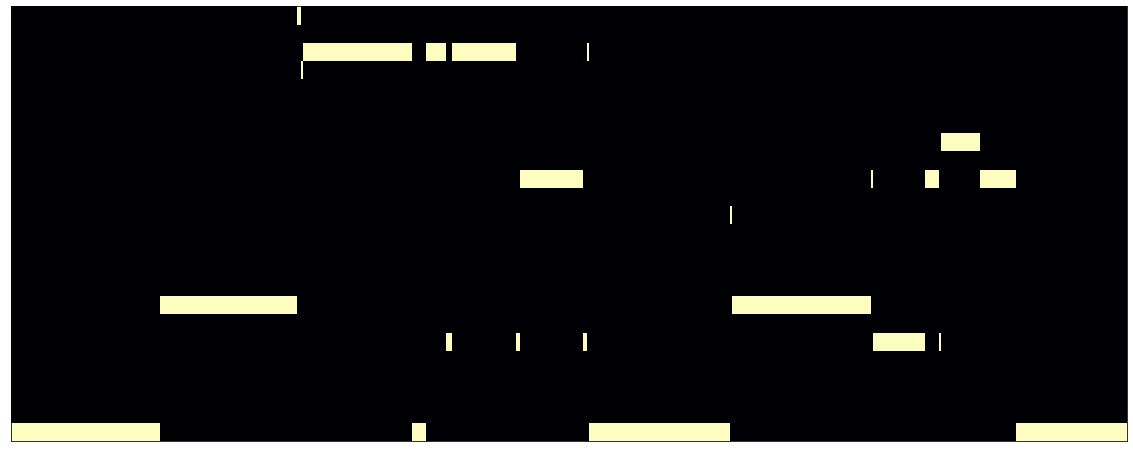

In [10]:
# variant 1: own argmax functionality inside loop structure
temp = 0
maxi = 0
zaehler = 0
stellex = 0
stelley = 0
end_matrix = np.zeros(chord_sim.shape)
for index in range(len(chord_sim[0])):
    for zaehler in range(24):
        # print(index, zaehler)
        temp = chord_sim[zaehler, index]

        if temp > maxi:
            maxi = temp
            stellex = zaehler
            stelley = index
    
        if zaehler == 23:
    
            end_matrix[stellex, stelley] = 1 
            maxi = 0

plt.figure(figsize=(20, 8))
lr.display.specshow(end_matrix)
plt.show()

In [11]:
# variant 2: use argmax with axis argument
max_idx = np.argmax(chord_sim, axis=0)
max_idx

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7, 23, 23, 20, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,  0,  0,  0,  0,  0,
        0,  0, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,  5,  5,  5, 21, 21,
       21, 21, 21, 21, 21

In [12]:
# variant 3: use argmax inside loop-structure

max_idx_2 = np.zeros(chord_sim.shape[1])

for win_idx in range(chord_sim.shape[1]):
    max_idx_2[win_idx] = np.argmax(chord_sim[:, win_idx])

max_idx_2

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7., 23.,
       23., 20., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21.,
       21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21.,
       21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21

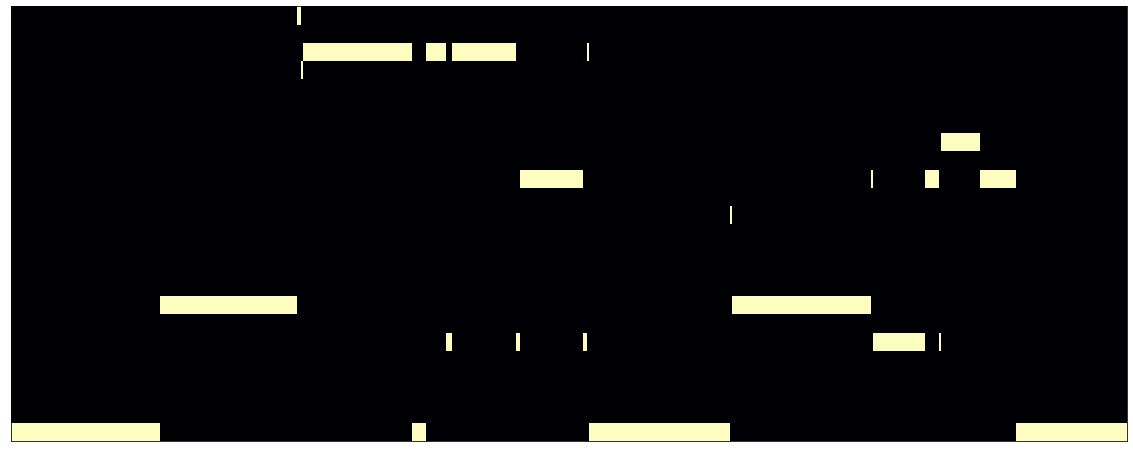

In [13]:
chords_max = np.zeros_like(chord_sim)

for n in range(len(max_idx)):
    chords_max[max_idx[n], n] = 1

plt.figure(figsize=(20, 8))
lr.display.specshow(chords_max)
plt.show()